In [2]:
# use a heat map to show timestep decisions 
# Y-axis is input, X-axis is timesteps
# colormap on the right of image

# TODO: we need the tokenizer

In [3]:
import json
import re

import numpy as np

from transformers import BartTokenizer

In [4]:
tokenizer = BartTokenizer.from_pretrained('bart-large-cnn')

In [5]:
# rows are inputs
# columns are timesteps
# values are input-specific logprobs

# decoding_metadata = [json.loads(l) for l in open('../wcep_5_articles_decoding_metadata.jsonl')]

# decoding_metadata = [json.loads(l) for l in open('../wcep_scramble_test_case_5_articles_decoding_metadata.jsonl')]
decoding_metadata = [json.loads(l) for l in open('../wcep_scramble_middle_test_case_5_articles_decoding_metadata.jsonl')]


In [6]:
decoding_metadata[0].keys()

dict_keys(['cluster', 'predictions', 'inputs_used', 'component_scores', 'decoding_metadata'])

In [7]:
idx_to_plot = 0

for _, s, _ in decoding_metadata[idx_to_plot]['decoding_metadata']:
    print(s)

hyp, global_score, input_scores = decoding_metadata[idx_to_plot]['decoding_metadata'][0]

# each row of decoding metadata is 
# (hyp, global_score, input_scores) -- each row corresponding to one beam hypothesis,
# sorted by global (ensemble) score

score_grid = [[t['score'] for t in input_score]
              for input_score in decoding_metadata[idx_to_plot]['decoding_metadata'][0][2]]
score_grid = np.vstack(score_grid)

# column norm
score_grid = (score_grid - score_grid.mean(axis=0)) / score_grid.std(axis=0)

# all(best_t == h_t['token'] for best_t, h_t in zip(best_hyp[1:], beam_hyps[3]))

-0.01784877438517012
-0.017864177636140902
-0.017920125927445452
-0.018555539825258874
-0.018621018990962464


In [8]:
hyp_tokens = [re.sub('Ġ', '', tokenizer.convert_ids_to_tokens(id))
              for id in decoding_metadata[idx_to_plot]['decoding_metadata'][0][0]]
# cut off first token because input hyps don't use it
hyp_tokens = hyp_tokens[1:]

In [9]:
decoding_metadata[idx_to_plot]['predictions'][0]

' A referendum is held in Belize to determine whether to appeal to the International Court of Justice (ICJ) to resolve a dispute between the governments of Belize and Guatemala over the disputed land border between the two countries, which has been a source of friction between the countries since the beginning of the 20th century.'

In [10]:
score_grid.sum(axis=1)

array([ 27.33463381,  22.50961418, -75.48951544,  -1.86266102,
        27.50792846])

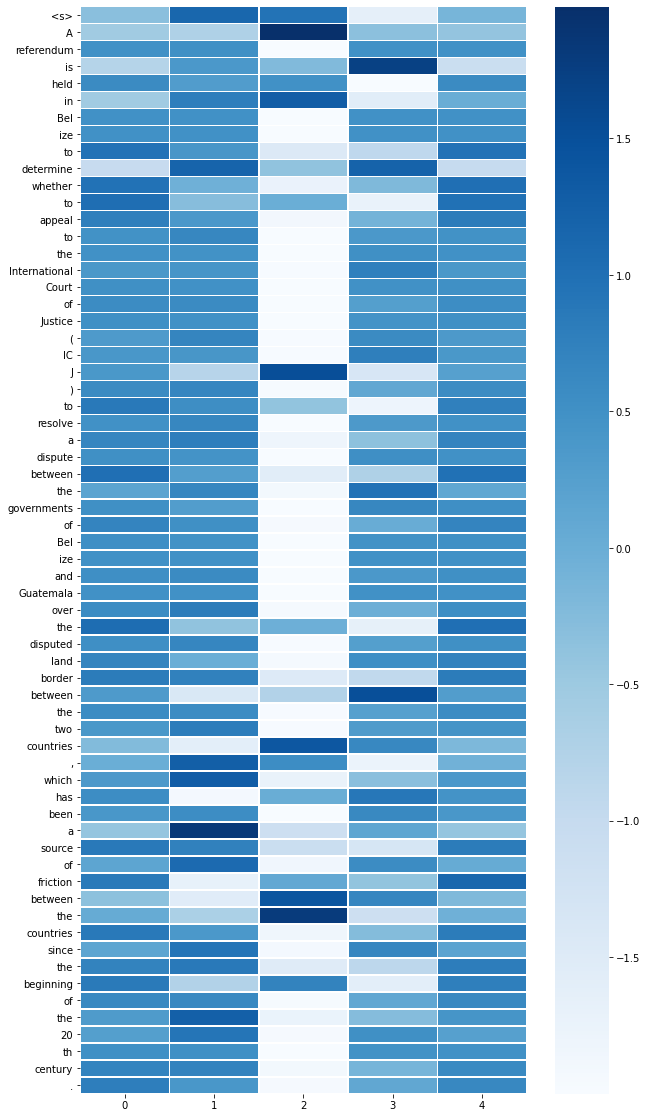

In [13]:
%matplotlib inline 

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.figsize'] = [10, 20]


import seaborn as sns
import matplotlib.pylab as plt

#                  xticklabels=[f'{v:0.3f}' for v in hyperparams[1][1]],
#                  annot=True

ax = sns.heatmap(score_grid.T,
                 yticklabels=hyp_tokens,
                 linewidth=0.5,
                 cmap='Blues'
                )
# ax.set(xlabel=hyperparams[0][0], ylabel=hyperparams[1][0])

plt.show()

In [14]:
for idx, inp in enumerate(decoding_metadata[idx_to_plot]['inputs_used']):
    print(f'{idx}: {inp}')
    print()

0: Belizeans vote to ask U.N. court to settle Guatemala border dispute   BELIZE CITY (Reuters) - Belizeans have voted to ask the United Nations world court to decide Guatemala’s claim that it is the rightful owner of half of Belize’s territory, setting the scene for a resolution to a dispute that has rumbled on for centuries. In a referendum held on Wednesday, 55.4 percent of voters opted to send the matter to the International Court of Justice (ICJ) in The Hague, according to results published by Belize’s elections and boundaries department on Thursday. The remaining 44.6 percent of voters in the former British colony in Central America opposed the motion to ask the court. Guatemalans in April 2018 voted by an overwhelming majority to have the ICJ rule on the dispute, which stretches back to the dawn of the colonial era in the Americas. In a statement, Guatemala’s government applauded the result and said it would immediately contact the foreign ministry of Belize to agree the next ste